# Regressão linear sobre os dados abertos do programa cidades digitais
O programa Cidades Digitais promove a inclusão dos órgãos públicos das Prefeituras Municipais no mundo das TIC, com os objetivos de modernizar a gestão, ampliar o acesso aos serviços públicos e promover o desenvolvimento dos municípios brasileiros por meio da tecnologia

# carregar dados

In [83]:
import pandas as pd
df = pd.read_csv('dados/dadosabertos_cidadesdigitais_jan.csv', sep=';')

In [22]:
df.head()

,UF,Cidade,CÓDIGO IBGE,POPULAÇÃO ESTIMADA,Valor Previsto,PEAS,PAG,PAP,PCG,PONTOS ATENDIDOS,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,BA,Abaré,2900207.0,19.939,"R$ 490.227,43",1,2,3,17.0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES,Afonso Cláudio,3200102.0,32.407,"R$ 780.654,21",1,2,3,21.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BA,Anagé,2901205.0,19.824,"R$ 510.328,56",1,2,2,10.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MG,Ataléia,3104700.0,13.897,"R$ 677.429,81",1,2,2,15.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,Boa Vista do Tupim,2903805.0,19.516,"R$ 548.582,05",1,2,2,23.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df = df[['UF','Cidade', 'CÓDIGO IBGE', 'POPULAÇÃO ESTIMADA', 'Valor Previsto', 'PEAS', 'PAG', 'PCG', 'PONTOS ATENDIDOS', 'Status', 'Status Implantação']]

# análise exploratória dos dados

In [24]:
df.shape

(338, 11)

In [25]:
df.describe()

,CÓDIGO IBGE,PEAS,PAG,PCG,PONTOS ATENDIDOS
count,3.340000e+02,338.0,338.000000,283.000000,338.000000
mean,2.895998e+06,1.0,4.795858,16.816254,22.393491
std,9.685694e+05,0.0,6.181938,10.361625,9.623886
min,1.100106e+06,1.0,0.000000,0.000000,5.000000
25%,2.209124e+06,1.0,2.000000,10.000000,15.000000
50%,2.902807e+06,1.0,2.000000,15.000000,21.000000
75%,3.514815e+06,1.0,2.000000,22.000000,27.000000
max,5.300108e+06,1.0,30.000000,52.000000,58.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UF                  338 non-null    object 
 1   Cidade              338 non-null    object 
 2   CÓDIGO IBGE         334 non-null    float64
 3   POPULAÇÃO ESTIMADA  334 non-null    object 
 4   Valor Previsto      338 non-null    object 
 5   PEAS                338 non-null    int64  
 6   PAG                 338 non-null    int64  
 7   PCG                 283 non-null    float64
 8   PONTOS ATENDIDOS    338 non-null    int64  
 9   Status              337 non-null    object 
 10  Status Implantação  338 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 29.2+ KB


In [85]:
df.isnull().sum()

UF                     0
Cidade                 0
CÓDIGO IBGE            4
POPULAÇÃO ESTIMADA     4
Valor Previsto         0
PEAS                   0
PAG                    0
PCG                   55
PONTOS ATENDIDOS       0
Status                 1
Status Implantação     0
dtype: int64

# limpeza dos dados

In [86]:
# manipulando valores em falta
df.dropna(inplace=True)

In [87]:
df['POPULAÇÃO ESTIMADA'] = pd.to_numeric(df['POPULAÇÃO ESTIMADA'], errors='coerce')

In [93]:
x = df['Valor Previsto'].replace('[R$. ]', '', regex=True)
x = x.replace('[,]', '.', regex=True)
df['Valor Previsto'] = pd.to_numeric(x, errors='coerce')
#df['Valor Previsto'] = df['Valor Previsto'].apply(lambda x: float(x.replace(".","").replace(",",".")))
#df['Valor Previsto']

In [94]:
df['Valor Previsto']

0      490227.43
1      780654.21
2      510328.56
3      677429.81
4      548582.05
         ...    
332    484547.53
333    328258.55
334    572200.39
335    935412.72
336    772597.30
Name: Valor Previsto, Length: 278, dtype: float64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 336
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UF                  278 non-null    object 
 1   Cidade              278 non-null    object 
 2   CÓDIGO IBGE         278 non-null    float64
 3   POPULAÇÃO ESTIMADA  278 non-null    float64
 4   Valor Previsto      278 non-null    float64
 5   PEAS                278 non-null    int64  
 6   PAG                 278 non-null    int64  
 7   PCG                 278 non-null    float64
 8   PONTOS ATENDIDOS    278 non-null    int64  
 9   Status              278 non-null    object 
 10  Status Implantação  278 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 26.1+ KB


# preparação dos dados

In [105]:
import numpy as np
X = np.c_[np.ones((278,1)), df['POPULAÇÃO ESTIMADA']]
y = df['Valor Previsto']

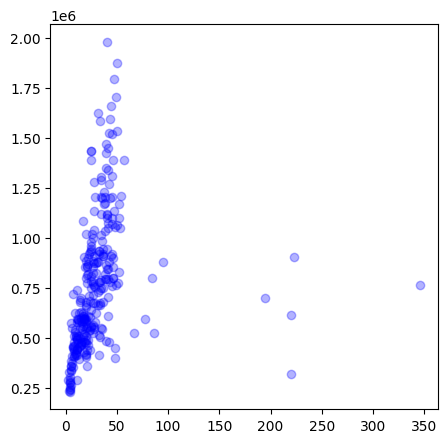

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(df['POPULAÇÃO ESTIMADA'], df['Valor Previsto'], color='b', alpha=0.3)

In [106]:
X.shape

(278, 2)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criação do modelo 

# treinamento

In [111]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print ('Coefficients: ', lr_model.coef_)

Coefficients:  [   0.         4460.59544756]


# teste

In [112]:
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# resultados

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_pred_lr_train)
lr_train_r2 = r2_score(y_train, y_pred_lr_train)

lr_test_mse = mean_squared_error(y_test, y_pred_lr_test)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)

In [114]:
print(f"LR MSE train error", lr_train_mse)
print(f"LR R2 train error", lr_train_r2)
print(f"LR MSE test error", lr_test_mse)
print(f"LR R2 test error", lr_test_r2)

LR MSE train error 101747740211.06813
LR R2 train error 0.11947637658818844
LR MSE test error 149053145893.63962
LR R2 test error -0.3998340995573677


# previsão

Text(0.5, 1.0, 'Linear Regression Model')

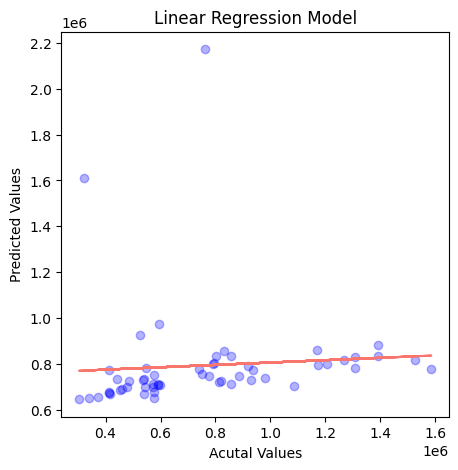

In [117]:
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_lr_test, color='b', alpha=0.3)

z = np.polyfit(y_test, y_pred_lr_test, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel("Predicted Values")
plt.xlabel("Acutal Values")
plt.title("Linear Regression Model")